In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

## setup path and load data

In [2]:
# load data
data_folder = "/central/scratch/jiahe/les_risingubble/netcdf/";
analysis_folder = "/central/scratch/jiahe/les_risingubble/analysis/";

auxdata = nc.Dataset(data_folder+"DryRisingBubble_DumpAux-2020-06-26T17.06.46.03.nc", "r");
statedata = nc.Dataset(data_folder+"DryRisingBubble_DumpState-2020-06-26T17.06.46.03.nc", "r");

In [3]:
t = statedata["time"][:];
x = statedata["x"][:];
y = statedata["y"][:];
z = statedata["z"][:];

xlen = len(x)
ylen = len(y)
zlen = len(z)

ρ = statedata["ρ"][:].mean(axis=2)
ρ_ref = auxdata["ref_state.ρ"][:].mean(axis=2)

θ_v = auxdata["moisture.θ_v"][:].mean(axis=2)

ρ_a = ρ[:] - ρ_ref[:]
b = -ρ_a/ρ[:]

w = (statedata['ρu[3]'][:].mean(axis=2))/ρ[:]

## check initial theta and density profile

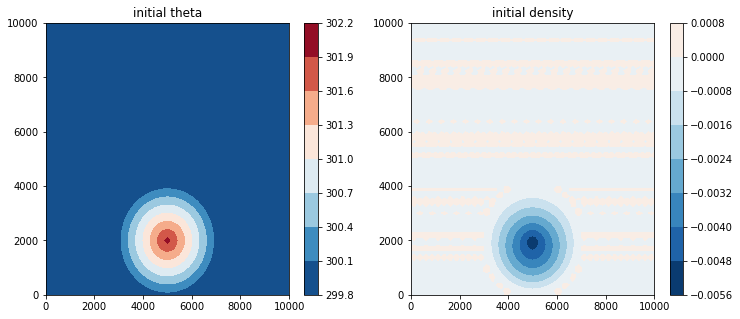

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

C=ax[0].contourf(x,z, θ_v[0,:,:], cmap='RdBu_r')
plt.colorbar(C, ax=ax[0])
ax[0].set_title('initial theta')

tm = abs(ρ_a[0,:,:]).max()
C=ax[1].contourf(x,z, ρ_a[0,:,:], vmin=-tm, vmax=tm, cmap='RdBu_r')
plt.colorbar(C, ax=ax[1])
ax[1].set_title('initial density')

plt.savefig(analysis_folder+"initial-profile.pdf")
plt.show()


## check snapshots of every 20 steps

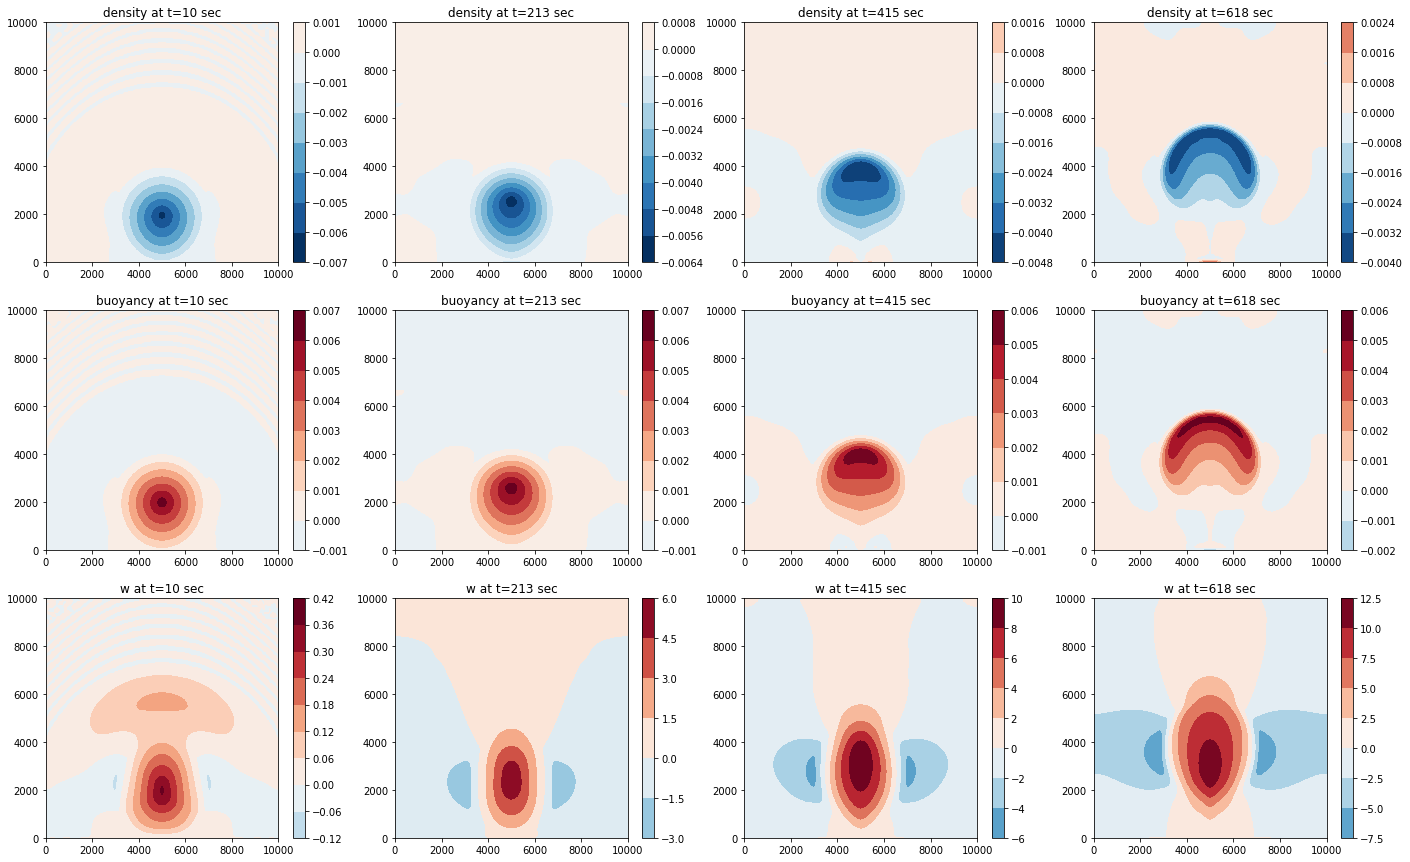

In [5]:
fig, ax = plt.subplots(3,4,figsize=(24,15))

for ii, it in enumerate(np.arange(1, 80, 20)):
    
    tm = abs(ρ_a[it,:,:]).max()
    C=ax[0,ii].contourf(x,z, ρ_a[it,:,:], vmin=-tm, vmax=tm, cmap='RdBu_r')
    plt.colorbar(C, ax=ax[0,ii])
    ax[0,ii].set_title('density at t='+str(int(t[it]))+' sec')
    
    tm = abs(b[it,:,:]).max()
    C=ax[1,ii].contourf(x,z, b[it,:,:], vmin=-tm, vmax=tm, cmap='RdBu_r')
    plt.colorbar(C, ax=ax[1,ii])
    ax[1,ii].set_title('buoyancy at t='+str(int(t[it]))+' sec')
    
    tm = abs(w[it,:,:]).max()
    C=ax[2,ii].contourf(x,z, w[it,:,:], vmin=-tm, vmax=tm, cmap='RdBu_r')
    plt.colorbar(C, ax=ax[2,ii])
    ax[2,ii].set_title('w at t='+str(int(t[it]))+' sec')

plt.savefig(analysis_folder+"snapshots-profile.pdf")
plt.show()
